# <div style=" text-align: center; font-weight: bold">Phase 03: Exploratory data analysis</div>


## **Import necessary Python modules**

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import re
import json
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


## **Making some question**
### Read the data from file
First, read the clean data that we cleaned before to a dataframe.

In [192]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')
real_estate_for_sale_df.head()

,Type,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Furniture,Legal,Posting date,District,Project
0,Căn hộ chung cư,161.08,1.798000e+10,3.0,3.0,4.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-06,1,Dự án Zenity
1,Căn hộ chung cư,116.00,9.800000e+09,3.0,2.0,4.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-03,1,Dự án Zenity
2,Căn hộ chung cư,77.00,6.000000e+09,2.0,2.0,4.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-01,1,Dự án Zenity
3,Căn hộ chung cư,76.00,6.200000e+09,2.0,2.0,4.0,Nội thất đầy đủ,Hợp đồng mua bán,2023-12-05,2,Dự án Lumiere Riverside
4,Căn hộ chung cư,95.00,7.600000e+09,2.0,2.0,4.0,Nội thất đầy đủ,Sổ đỏ và sổ hồng,2023-12-07,1,Dự án Zenity


### **Question 01: How the numbers of real estate is distributed by the district in Ho Chi Minh City? Which district have the most real estate? Which type of real estate is the signature for each district?**

- Meaning of the question: By answering this question, we will know which district in Ho Chi Minh City will contain many real estate. From that, like a buyer, we can choose the potential and the location of the real estate we want.

First, let's extract the column `Type` and `District` of dataframe.

In [193]:
real_estate_by_district_df = real_estate_for_sale_df[['Type', 'District']]

#### **1.1 Number of real estates in each district**
Now, we will see how the real estate is distributed by the district. We will use bar chart to show the number of real estates are currently in a district.

In [194]:
district_count = real_estate_by_district_df['District'].value_counts().reset_index()

In [195]:

district_count.sort_values(ascending = False ,by='count', inplace= True)

fig = px.bar(district_count,
              x='count',
              y='District', orientation='h', color='count',
             color_continuous_scale='viridis_r', title='<b>IDE used on a regular basis</b>',
             labels={'count': '<b>Count</b>', 'District': '<b>District</b>'})

fig.update_layout(
               title_font_size = 30,
               width = 1000,
               height = 800,
               margin=dict(l=20, r=30, t=70, b=20),
               paper_bgcolor='#ffe6cc',
               xaxis=dict(tickfont=dict(size=16)),
               yaxis=dict(tickfont=dict(size=16), ticksuffix = "  ")
               )
fig.update_traces(marker_line_color='black', marker_line_width=1.0, hovertemplate='<b>%{x}</b> real estates are located in <b>district %{y}</b>')
fig.show(config=dict({'scrollZoom':False}))

Through the plot, we can see most of the real estate for sale are in `District 7`, `District 2`, `Bình Thạnh district`, and `District 9`. So these districts contain most of the percentage of the real estate.


https://github.com/thien0291/vietnam_dataset/tree/master

In [196]:
gdf = gpd.read_file("../Data/ho-chi-minh-city.geojson")
fig = px.choropleth_mapbox(
                            gdf, 
                           geojson=gdf.geometry, 
                           locations=gdf.index,
                           color=gdf['name'],
                           mapbox_style="carto-positron",
                           center={"lat": 10.7769, "lon": 106.7009},
                           zoom=9,
                           title='Map of Ho Chi Minh City and Districts'
                          )
fig.show()


#### **1.2 Distribution of real estates' types in each district**
Now, let's see which is the signature type for each district.     
For this, we will find the percentage of each type of real estate that located at a district

In [197]:
district_type_df = real_estate_for_sale_df[['Type', 'District']]
district_type_df = district_type_df.groupby('District')['Type'].value_counts().reset_index(name = 'Count')

district_type_df.loc[:, 'Percentage'] = (district_type_df.loc[:,'Count'] / district_type_df.groupby('District')['Count'].transform('sum'))*100
district_type_df.loc[:, 'Percentage'] = district_type_df.loc[:, 'Percentage'].round(2)

district_type_df

,District,Type,Count,Percentage
0,1,Nhà riêng,571,40.01
1,1,Nhà mặt phố,484,33.92
2,1,Căn hộ chung cư,362,25.37
3,1,Đất bán,6,0.42
4,1,"Nhà biệt thự, liền kề",4,0.28
...,...,...,...,...
122,Tân Phú,Căn hộ chung cư,986,38.11
123,Tân Phú,Nhà riêng,896,34.63
124,Tân Phú,Nhà mặt phố,621,24.00
125,Tân Phú,Đất bán,72,2.78



Now for each district, we will draw a pie chart to show the percentage of each real estate type in the district.

In [198]:
fig = px.pie(
            district_type_df,
            names ='Type',
            values = 'Percentage',
            color = 'Type',
            labels={ 'District': '<b>Quận</b>'},
            facet_col='District',
            facet_col_wrap = 4,
            facet_col_spacing=0.04,
            facet_row_spacing= 0.04, 
            color_discrete_map= {
                                'Nhà mặt phố': '#F5FCCD',
                                'Nhà riêng' : '#78D6C6',
                                'Căn hộ chung cư': '#4ba775',
                                'Nhà biệt thự, liền kề' : '#088395',
                                'Đất bán': '#17526e',
                                'Đất nền dự án': '#071952'
                    
                                }
            )

fig.update_layout(
    width=1100,
    height=1500,
    margin=dict(l=20, r=20, t=90, b=20),
    paper_bgcolor='#ffe6cc',
    title='<b>Percentage Distribution of Real Estate Types by District</b>',
    title_font_size=25,
)
fig.update_traces(
    marker_line_color='black',
    marker_line_width=0.5,
    hovertemplate='<b>%{label}</b> has the percentage of <b>%{value}%</b>',
    textposition='inside', insidetextorientation='radial',
)


fig.show()


Which the percentage of the real estate type in each district, we get some observation about the distribution of real estate type in each district below:

- `District 01` : The majority of real estate consists of `Nhà mặt phố`( 58.90%), `Nhà riêng`(24.82%) also make up a significant portion as well, followed by `Căn hộ chung cư`(13.4%).

- `District 10` : In district 10, the two most significant types are `Nhà riêng` and `Nhà mặt phố`. `Nhà riêng` represents 43.3%, while `Nhà mặt phố` accounts for 40.17%.

- `District 11`: Similar to `District 10`, the major types in `district 11` are `Nhà riêng`( 46.84%) and `Nhà mặt phố` (39.51%)

- `District 12`: The most prominent real estate types are `Nhà riêng`(37.31%) and `Đất bán`(25.38%). `Nhà mặt phố` and `Căn hộ chung cư` are also popular options.

- `District 02`: District 2 is characterized by the high percentage of `Căn hộ chung cư`(up to 50.19%). `Nhà mặt phố`, `Đất bán`, `Nhà biệt thự, liền kề` also have a notable percentage in this district.

- `District 03`: In district 3, two types that we can get more concern are `Nhà mặt phố`(52.11%) and ` Nhà riêng`(39.45%).

- `District 04`: In District 4, the majority of real estate are `Căn hộ chung cư`(65.13%),followed by `Nhà riêng`(26.28%).

- `District 05`: In District 5, two major types of real estate are `Nhà mặt phố`(53.49%) and `Nhà riêng`(33%) 

- `District 06`: The majority of real estate is `Căn hộ chung cư`(42.40%), `Nhà mặt phố` also make up a significant proportion at 32.84%, followed by `Nhà riêng` with 22.06%.

- `District 07`: In District 7, the majority of real estate consist of `Căn hộ chung cư`(46.08%),`Nhà riêng` (16.86%) `Nhà mặt phố`(14.00%), `Nhà biệt thự, liền kề`(13.58%).

- `District 08`: In District 8, the major types are `Căn hộ chung cư`(42.30%), `Nhà riêng`(31.60%), followed by `Nhà mặt phố`(12.40%).

- `District 09`: In District 9, there is an equal percentage for each type, with `Căn hộ chung cư`(25.84%), `Nhà biệt thự, liền kề`(18.02%) are the notable types.

- `District Bình Chánh`: The highest percentage are for `Đất bán`(30.60%) and `Căn hộ chung cư` (25.38%) , followed by `Nhà riêng` (12.01%) and `Đất nền dự án` (11.12%).

- `District Bình Thạnh`: In Bình Thạnh, `Nhà riêng` (43.92%) is the most significant real estat type, followed by `Nhà mặt phố`(26.87%) and `Căn hộ chung cư`(18.70%)

- `District Bình Tân`: In Bình Tân, `Nhà riêng`(42.23%), `Căn hộ chung cư`(22.58%) have the highest percentage.

- `District Cần Giờ`:In Cần Giờ, the majority of real estate is `Đất bán` (87.23%), while the other types contribute a very small percentage.

- `District Củ Chi`: Similar to `Cần Giờ`, the majority is also `Đất bán`, accounting for 85.60% of the total.

- `District Gò Vấp`: In Gò Vấp, the majority of real estate are `Nhà riêng` (58.87%), `Nhà mặt phố` (22.20%).

- `District Hóc Môn`: In Hóc Môn, the prominent real estate types are `Đất bán` (47.63%) and `Nhà riêng` (28.33%).

- `District Nhà Bè`: In Nhà Bè, the largest portion consists of `Căn hộ chung cư` (22.96%), followed by `Đất bán` (20.50%), `Nhà riêng` (16.87%).

- `District Phú Nhuận`: In Phú Nhuận, the majority are `Nhà riêng` (47.90%), `Nhà mặt phố` (38.07%).

- `District Thủ Đức`: In Thủ Đức, the largest portion of real estate consists of `Nhà riêng` (35.51%), `Đất bán` (24.19)%, `Căn hộ chung cư` (15.34%), and `Nhà mặt phố` (15.15%).

- `District Tân Bình`: In Tân Bình, `Nhà riêng` (48.2%), `Nhà mặt phố` (37.43%) are two most significant types of the real estate.

- `District Tân Phú`: In Tân Phú, `Căn hộ chung cư` (33.69%), `Nhà riêng` (32.93%) and `Nhà mặt phố` (28.66%) are types with highest percentage.

These are all the real estate types that is most significant for each district. We can see that, by the different of development conditions, the geographical position, and other factor, the significant types of real estate for sale in each district are also have differences.


**Overall:**
- Districts which have the major type is `Nhà riêng`: `Quận 10`, `Quận 11`, `Quận 12`, `Bình Thạnh`, `Bình Tân`, `Gò Vấp`, `Phú Nhuận`, `Tân Bình`, with over 50% percent.
- Disticts have the major type is `Căn hộ chung cư`: `Quận 2`, `Quận 4`, `Quận 6`, `Quận 7`, `Quận 8`
- Districts have the major type is `Nhà mặt phố`: `Quận 1`, `Quận 3`, `Quận 5`
- Districts have the major type is `Đất bán`: `Cần Giờ`, `Củ Chi`, `Hóc Môn`. 
- All other types just have a little percentage in each district. This indicates that the demand to sell these types of real estate are not very high, also not very popular in Ho Chi Minh City.

### **Question 02: Which factors will affect to the the price of each real estate type, which is the relationship between the price and other factors?**

Now, we will take a look about the relationship of price of each real estate type with other columns. But before that, in the price column have many price is `Thỏa thuận`. In this analysis, we just consider the real estate that have speccific price. Therefore, we will extract all the price which is not `Thỏa thuận` first.

In [199]:
real_estate_price = real_estate_for_sale_df.copy()

Now, let's group the `real_estate_price` by the type, then extract the each type to a new dataframe.

In [200]:
real_estate_price['Type'].value_counts()

Type
Nhà riêng                15232
Căn hộ chung cư          12928
Nhà mặt phố               7314
Đất bán                   4476
Nhà biệt thự, liền kề     2188
Đất nền dự án             1698
Name: count, dtype: int64


Now, let's consider the correlation between each factor to the price.
- To get the correlation between columns in the dataframe, we will use the correlation matrix. But before that we have to normalize the dataframe.:
    - With numerical column, we can use it directly
    - But with categorical columns like `Furniture`, `Legal`, `District`, we have to convert them into numerical datatype.

First, for each type of real estate, create a new dataframe for each type.

In [201]:
unique_types = ['Nhà riêng', 'Nhà mặt phố', 'Căn hộ chung cư', 'Nhà biệt thự, liền kề', 'Đất bán', 'Đất nền dự án']
real_estate_df_by_type = {}

for house_type in unique_types:

    current_type_df = real_estate_price[real_estate_price['Type'] == house_type].copy().reset_index()
    current_type_df = current_type_df.drop(columns=['index'])
    
    real_estate_df_by_type[house_type] = current_type_df


Now, for each type, let's see some statistical values of them. 

As we discuss before, the type `Đất bán`, `Đất nền dự án` will not have the column `Bedroom(Phòng)`, `Toilet(Phòng)`, `Floor(Tầng)`, `Furniture`, so let's drop them first

In [202]:
real_estate_df_by_type['Đất bán'].drop(columns = ['Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)
real_estate_df_by_type['Đất nền dự án'].drop(columns = ['Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'Furniture'], inplace = True)

real_estate_df_by_type['Nhà riêng']['Legal'].value_counts()

Legal
Sổ đỏ và sổ hồng      10528
Không có thông tin     3604
Sổ hồng                 857
Khác                    100
Hợp đồng mua bán         78
Sổ đỏ                    50
Đang chờ sổ              15
Name: count, dtype: int64

Okay, now with each type, let's convert the categorical column to numerical column. I will use `Scikit learn` library for this convert

In [203]:
ordinal_encoder = OrdinalEncoder()

columns_to_encode1 = ['District', 'Furniture', 'Legal']
columns_to_encode2 = ['District', 'Legal']

furniture_order = ['Không có thông tin', 'Khác', 'Không nội thất', 'Nội thất cơ bản', 'Nội thất đầy đủ', 'Nội thất sang trọng']
legal_order = ['Không có thông tin', 'Khác', 'Đang chờ sổ', 'Hợp đồng mua bán', 'Sổ hồng', 'Sổ đỏ', 'Sổ đỏ và sổ hồng']

ordinal_encoder.categories_ = [None, furniture_order, legal_order]

for house_type, df in real_estate_df_by_type.items():
    if house_type in ('Đất bán', 'Đất nền dự án'):
        for column in columns_to_encode2:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    else:
        for column in columns_to_encode1:
            encoded_column = ordinal_encoder.fit_transform(df[[column]])
            df[column] = encoded_column
    real_estate_df_by_type[house_type] = df


Now, we can find the correlation between each factor for each type of real estate. We will use heat map to visualize the result.

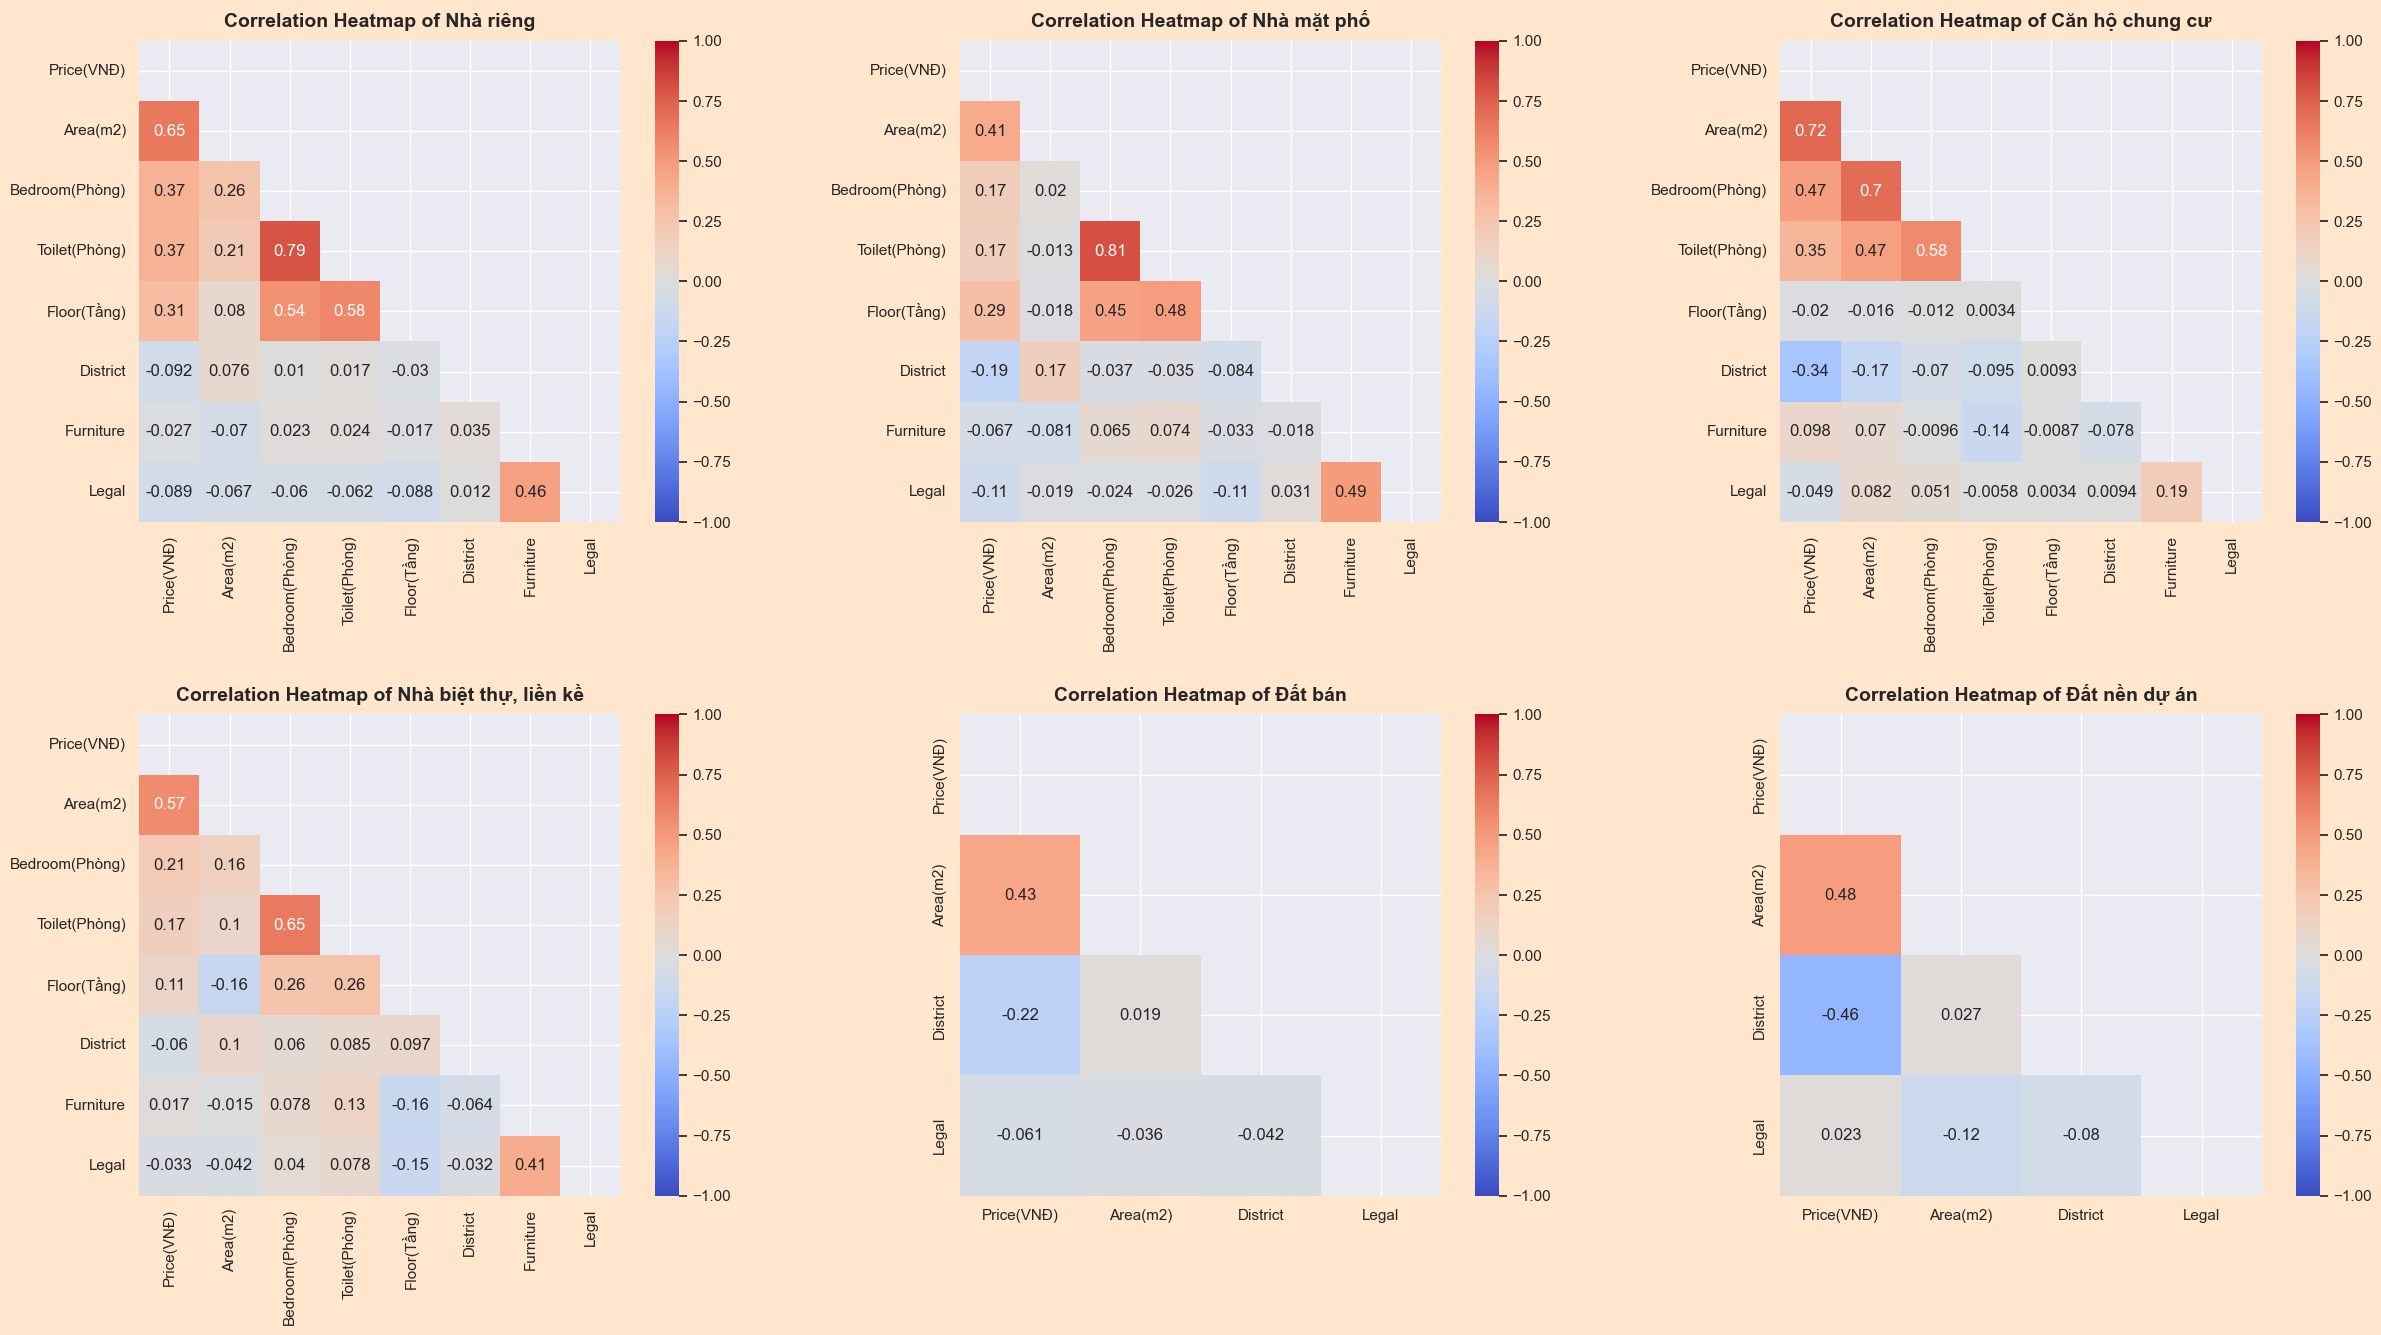

In [204]:
columns_to_correlate1 = ['Price(VNĐ)', 'Area(m2)', 'Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)', 'District', 'Furniture', 'Legal']
columns_to_correlate2 = ['Price(VNĐ)', 'Area(m2)', 'District', 'Legal']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

sns.set()
i = 0
for type in real_estate_df_by_type:
    if type in ('Đất bán', 'Đất nền dự án'):
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate2].corr()
    else:
        correlation_matrix = real_estate_df_by_type[type][columns_to_correlate1].corr()
    ax = axes[i//3, i%3]
    
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1, ax= ax, mask= mask)
    ax.set_title(f'Correlation Heatmap of {type}', fontsize = '14', fontweight = 'bold', pad = 10)
    i += 1

plt.subplots_adjust(wspace=0.2, hspace=0.4)
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

By these heat map, we can see that: 
- With type `Nhà riêng`, `Căn hộ chung cư`:
    - The correlation is quite similar, with a strong correlation between the `price` with `area`, the number of `bedroom`,` toilet`. That indicates that the these factors is the important criterian for a person to determine the price of the real estate.
    - There is the low correlation between the `Price` with `District`, `Legal`, `Furniture`. It means `District`, `Legal`, `Furniture` are not affect the `Price` much.

- Beside that, with `Nhà mặt phố`, just show that the correlation between `Price` with other factors is not very high. Some notable factors are `Area` and `Floor`, but it just higher than others a little.

- With `Đất bán ` and `Đất nền dự án`, we can see that the price of `Đất nền dự án` have more correlation with the area than `Đất bán`. So we can get the key factor is the `Project` that the real estate belong to. 

Anyway, The realationship between `Price` with other factors are different between each type of real estate.

### **Question 03: How the Price of each real estate type is distributed in each district.**